# Neurona Lineal Adaptativa - Adaline
Es un tipo de red neuronal (NN) de una capa única.
El algoritmo **Adaline** es particularmente interesante porque ilustra los conceptos principales de definir y minimizar **funciones de coste** continuas.

La principal diferencia entre la regla Adaline y el Perceptron es que los pesos son actualizados en base a una **función de activación lineal** en lugar de una función escalón unitaria como en el perceptron. En Adaline, esta función de activación lineal, $\phi(z)$, es simplemente la **función identidad** de la entrada neta, así que

$$\phi(\textbf{w}^T\textbf{x})=\textbf{w}^T\textbf{x}$$

Aunque se utiliza la función de activación lineal para actualizar los pesos, aún se utiliza la **función umbral** para realizar la predicción final, que es similar a la función escalón unitaria.

## Minimización de las funciones de coste mediante el *gradiente descendente*
Uno de los ingredientes clave de los algoritmos de aprendizaje automático supervisado es la definición de una **función objetivo** que se tiene que optimizar durante el proceso de aprendizaje. Esta función objetivo es, normalmente, una **función de coste** que se quiere minimizar. En el caso de Adaline, se puede definir esta función, *J*, para aprender los pesos como la **suma de los errores cuadráticos (SSE)** entre el resultado calculado y la etiqueta de clase real.

$$J(\textbf{w})=\frac{1}{2}\sum_{i}(y^{(i)}-\phi(z^{(i)}))^2$$

La principal ventaja de esta función de activación lineal, con respecto a la función escalón unitaria, es que la función de coste se vuelve diferenciable. Otro aspecto a destacar de la función de coste es que es convexa; por ello, se puede utilizar un **algoritmo de optimización** muy simple pero potente denominado **gradiente descendente** para encontrar los pesos que minimizan la función de coste.

Se puede describir la idea principal detras del gradiente descendente como el descenso de una colina hasta que se alcanza un coste mínimo global o local. En cada iteración, se toman pasos en la dirección opuesta al gradiente, donde el tamaño del paso esta determinado por el valor de la **tasa de aprendizaje**, así como la pendiente del gradiente.

Utilizando el gradiente descendente, se puede actualizar los pesos tomando pasos en la dirección opuesta al gradiente, $\nabla J(\textbf{w})$, de la función de coste $J(\textbf{w})$:

$$\textbf{w} := \textbf{w} + \Delta\textbf{w}$$

El cambio de peso, $\Delta\textbf{w}$, se define como el gradiente negativo multiplicado por la tasa de aprendizaje, $\eta$:

$$\Delta\textbf{w} = -\eta\nabla J(\textbf{w})$$

Para calcular el gradiente de la función de coste, es necesario calcular la derivada parcial de la función de coste con respecto a cada peso, $\textbf{w}_j$:

$$\frac{\partial J}{\partial w_j} = - \sum_{i}(y^{(i)} - \phi(z^{(i)})x_j^{(i)}$$

Asi podemos escribir la actualización del peso $\textbf{w}_j$ como:

$$\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_i((y^{(i)} - \phi(z^{(i)}))x_j^{(i)}$$

Como se actualizan todos los pesos de forma simultanea simultaneamenta, la regla de aprendizaje Adaline, que a veces se denomina **gradiente descendete por lotes** se conviete en:

$$\textbf{w} := \textbf{w} + \Delta\textbf{w}$$



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import os
import pandas as pd

In [3]:
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris', 'iris.data')

In [4]:
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Se selecciona setosa y versicolor
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [7]:
# Se extrae la longitud del sépalo y del pétalo
X = df.iloc[0:100,[0,2]].values

In [8]:
from AdalineGD import AdalineGD

<IPython.core.display.Javascript object>


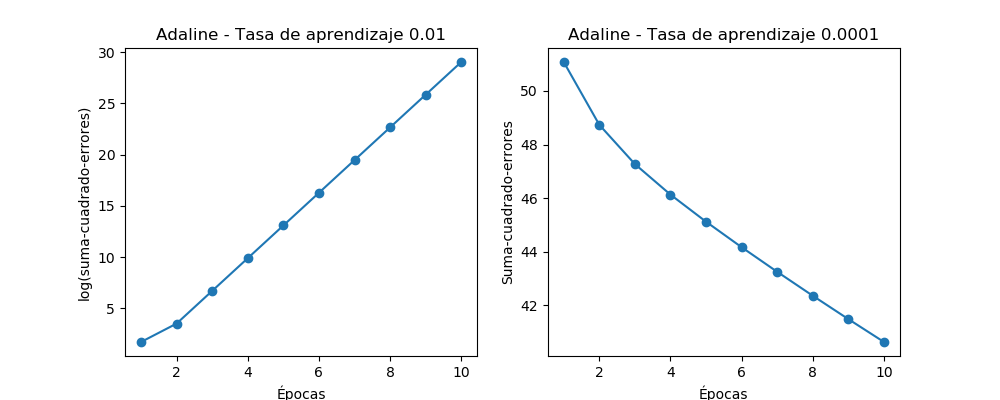

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), 
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('log(suma-cuadrado-errores)')
ax[0].set_title('Adaline - Tasa de aprendizaje 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1), 
           ada2.cost_, marker='o')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Suma-cuadrado-errores')
ax[1].set_title('Adaline - Tasa de aprendizaje 0.0001')
plt.show()

Como se puede ver en los diagramas, existen dos tipos de problemas referente a **la tasa de aprendizaje ($\eta$)**. 
- En el primer diagrama, en lugar de minimzar la función de coste, el error se vuelve cada vez más grande. **$\eta=0.01$ es demasiado grande**.
- En el segundo diagrama, **$\eta=0.0001$ es demasiado pequeña** y se necesitan muchas épocas para que el algoritmo converja al coste mínimo.

### Hiperparámetros ###
Se denominan hiperparámetros a la **tasa de aprendizaje** $\eta$, así como al **número de epocas**.

## Mejora del gradiente descendente por medio del escalado de las caracteristicas ##

El gradiente descendete es uno de los muchos algoritmos que se benefician del escalado de las caracteristicas. En esta sección se va a utilizar el método de escalado denominado **estandarización**, que proporciona a los datos propiedades de una distribución normal estándar. El procedimiento de normalización ayuda a que el método del gradiente descendente converja más rápidamente.
Para estandarizar la caracteristica *j*-esima se utiliza la siguiente función:

$$x'_j = \frac{x_j-\mu_j}{\sigma_j}$$

Donde $\mu_j$ es la media de la caracterisitca *j* y $\sigma_j$ su desviación estándar.

Primero estandarizamos las dos caracteristicas

In [10]:
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

Se entrena de nuevo AdalineGD y veremos como converge despues de un número pequeño de epocas con una tasa de aprendizaje $\eta=0.01$

In [11]:
from matplotlib.colors import ListedColormap

In [12]:
def plot_decision_regions(X, y, classifier, plt, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    #plt.xlim(xx1.min(), xx1.max())
    #plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=cl,
                     edgecolor='black')

<IPython.core.display.Javascript object>


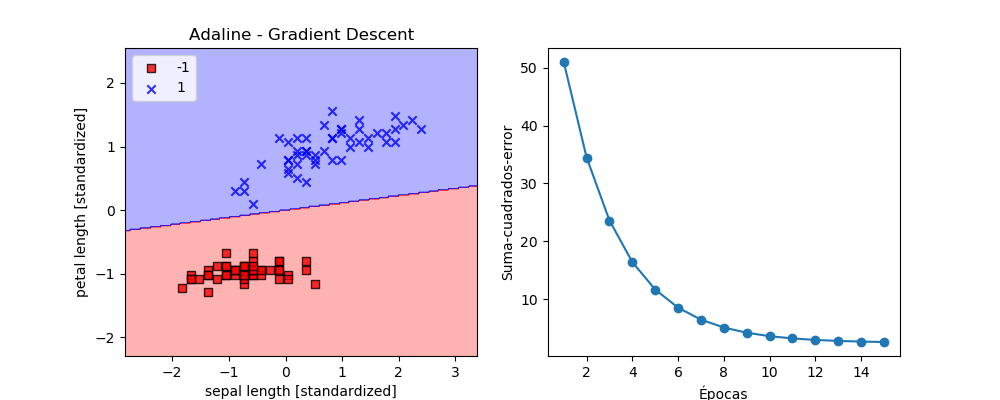

In [13]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std,y)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_decision_regions(X_std, y, classifier=ada_gd, plt=ax[0])
ax[0].set_title('Adaline - Gradient Descent')
ax[0].set_xlabel('sepal length [standardized]')
ax[0].set_ylabel('petal length [standardized]')
ax[0].legend(loc='upper left')
#ax[0].tight_layout()

ax[1].plot(range(1, len(ada_gd.cost_) + 1),
         ada_gd.cost_, marker='o')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Suma-cuadrados-error')
#plt.tight_layout()
plt.show()

## Aprendizaje automático a gran escala y el gradiente descendete estocástico ##
Cuando se tiene un conjunto de datos muy grande, ejecutar el gradiente descendente por lotes puede convertirse en una tarea computacionalmente muy costosa, ya que se necesita reevaluar el conjunto de datos de entrenamiento entero cada vez que se toma un paso hacia el minimo global.

Una alternativa al gradiente descendente por lotes es el **gradiente descendente estocástico (SGD)**, que a veces también se denomina gradiente descendente online o iterativo. En lugar de actualizar los pesos según la suma de los errores acumulados en todos los ejemplos de entrenamiento

$$\eta \sum_i((y^{(i)} - \phi(z^{(i)}))x^{(i)}$$

se actualiza los pesos incrementalmente para cada ejemplo de entrenamiento:

$$\eta (y^{(i)} - \phi(z^{(i)}))x^{(i)}$$

Aunque SGD se puede considerar una aproximación al gradiente descendente, normalmente **alcanza la convergencia más rápidamente** debido a la actualización más frecuente de los pesos. Como cada gradiente es calculado basandose en un único ejemplo de entrenamiento, la superficie de error es más ruidosa que en el gradiente descendente, lo que también puede tener la ventaja de que SGD puede escapar de mínimos locales poco profundos más fácilmente si estamos trabajando con funciones de costos no lineales. Para obtener resultados satisfactorios a través de SGD, es importante presentar los datos de entrenamiento en un orden aleatorio; Además, queremos barajar el conjunto de datos de entrenamiento para cada época para evitar ciclos.

Otra ventaja de SGD es que podemos utilizarlo para el **aprendizaje en línea**, donde el modelo se entrena sobre la marcha a medida que llegan nuevos datos de entrenamiento.


#### Gradiente descendente por mini lotes ####
Un compromiso entre el gradiente descendente por lotes y el SGD se denomina aprendizaje por mini lotes. El aprendizaje por mini lotes puede entenderse como la aplicación del gradiente descendente por lotes a subconjuntos más pequeños de datos de entrenamiento. La ventaja sobre el gradiente descendente por lote es que la convergencia se alcanza más rápido a través de mini lotes debido a las actualizaciones más frecuentes de los pesos.

In [14]:
from AdalineSGD import AdalineSGD

<IPython.core.display.Javascript object>


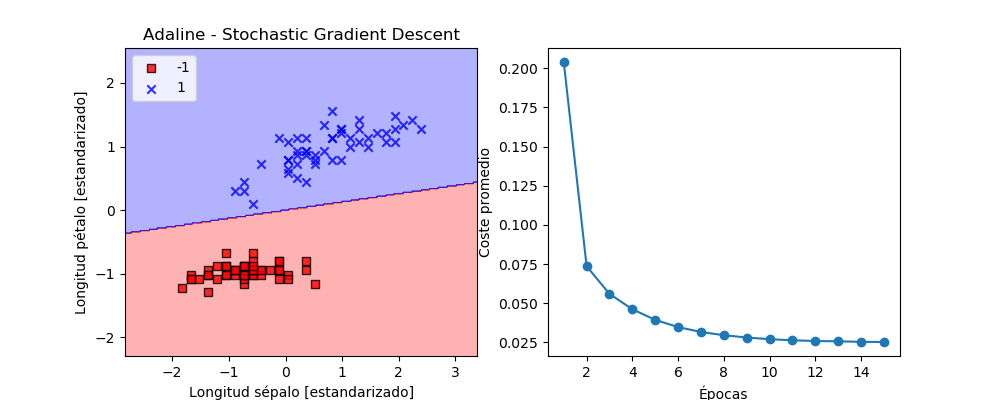

In [15]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_decision_regions(X_std, y, classifier=ada_sgd, plt=ax[0])
ax[0].set_title('Adaline - Stochastic Gradient Descent')
ax[0].set_xlabel('Longitud sépalo [estandarizado]')
ax[0].set_ylabel('Longitud pétalo [estandarizado]')
ax[0].legend(loc='upper left')
ax[1].plot(range(1, len(ada_sgd.cost_) + 1),
         ada_sgd.cost_, marker='o')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Coste promedio')
#plt.tight_layout()
plt.show()

El método `_shuffle` que se está utilizando en el clasificador AdalineSGD funciona de la siguiente manera: a través de la función `permutation` en `np.random`, generamos una secuencia aleatoria de números únicos en el rango de 0 a 100. Esos números se pueden usar como índices para barajar la matriz de características y el vector de etiquetas de clase.

Como se puede ver, el costo promedio baja bastante rápido, y el límite de decisión final después de 15 épocas se parece al de Adaline, con gradiente descendente por lotes. Si queremos actualizar nuestro modelo, por ejemplo, en un escenario de aprendizaje en línea con transmisión de datos, simplemente podríamos llamar al método `partial_fit` en ejemplos de entrenamiento individuales, por ejemplo `ada_sgd.partial_fit (X_std [0,:], y [0])`.